# Clasificación Enfermedades Neurovasculares.
Ronaldo Rafael Arias Parada.

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [152]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = pd.DataFrame(data)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [153]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [154]:
data.tail(n=10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [155]:
data.shape

(5110, 12)

In [156]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [158]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [159]:
df = pd.DataFrame(data)
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


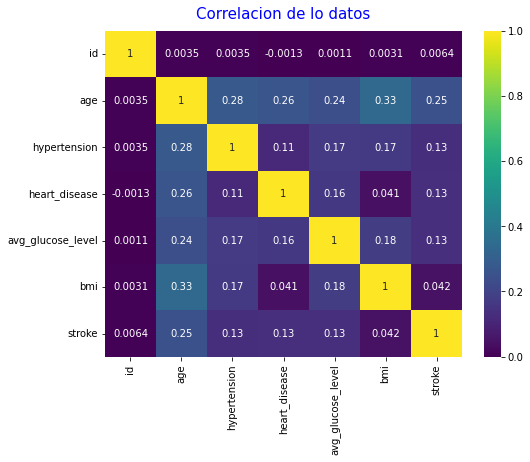

In [160]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlacion de lo datos', fontsize=15, pad=12, color='b')
plt.show()

In [134]:
def draw_missing_data_table(d):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [161]:
df=df.fillna(np.mean(data['bmi']))

In [162]:
data_numerical=df[['age','avg_glucose_level','bmi']]
data_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

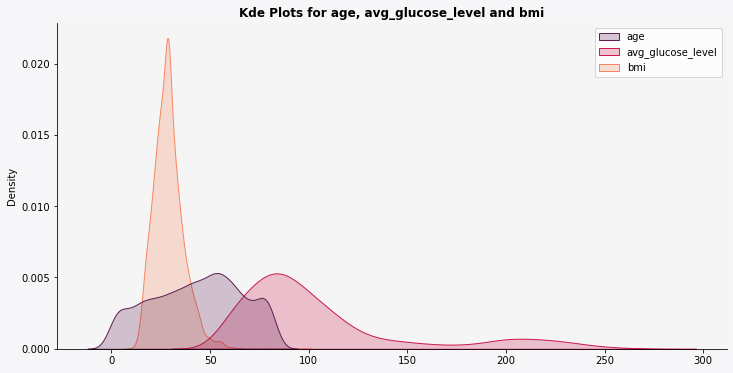

In [163]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')


In [164]:
#El avg_glucose_level está muy sesgado hacia la derecha y la mayor parte de la distribución está entre 50 y 150.

# El IMC está entre 0 y 50 para la mayoría de las personas.

# La edad se distribuye entre 0 y 100 casi por igual.

# Los datos no se distribuyen normalmente (tienen que normalizar o estandarizar).
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.076716,3.623061


# Análisis

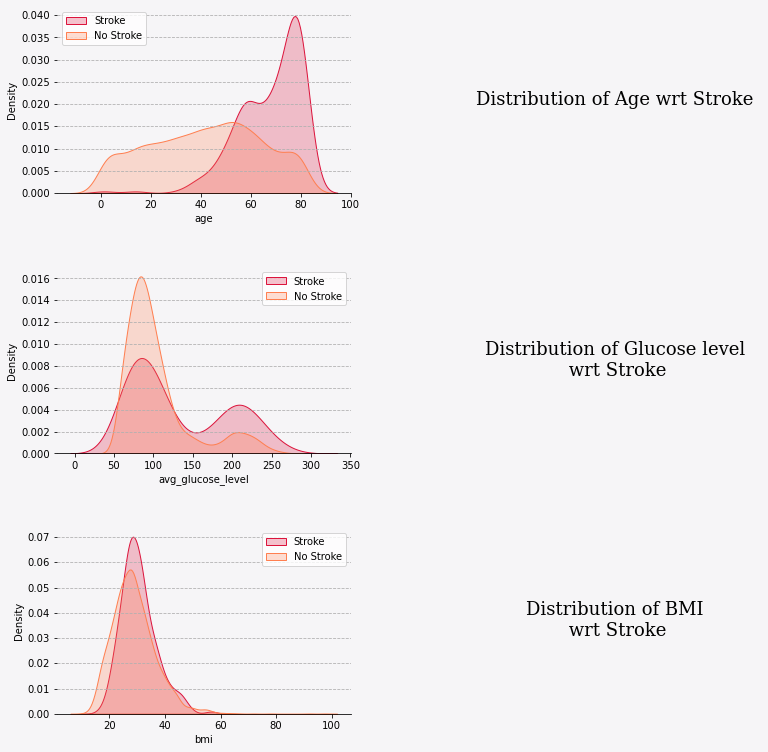

In [165]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of Glucose level\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribution of BMI\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

# Análisis de variables numéricas

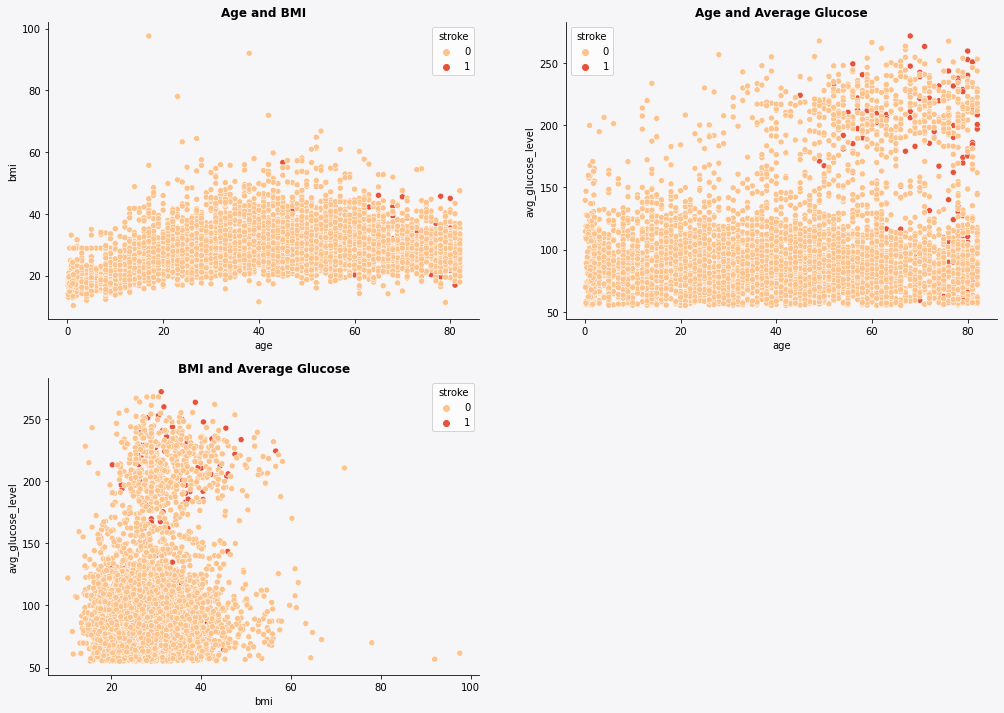

In [166]:
fig = plt.figure(figsize=(17,12))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
# Age and bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bmi'],hue=data_categorical['stroke'],palette="OrRd")
ax0.set_title('Age and BMI',fontweight='bold')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax1.set_title('Age and Average Glucose',fontweight='bold')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['bmi'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax2.set_title('BMI and Average Glucose',fontweight='bold')
#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

Text(-1.7, 1.1, 'Heatmap of Numerical Variables')

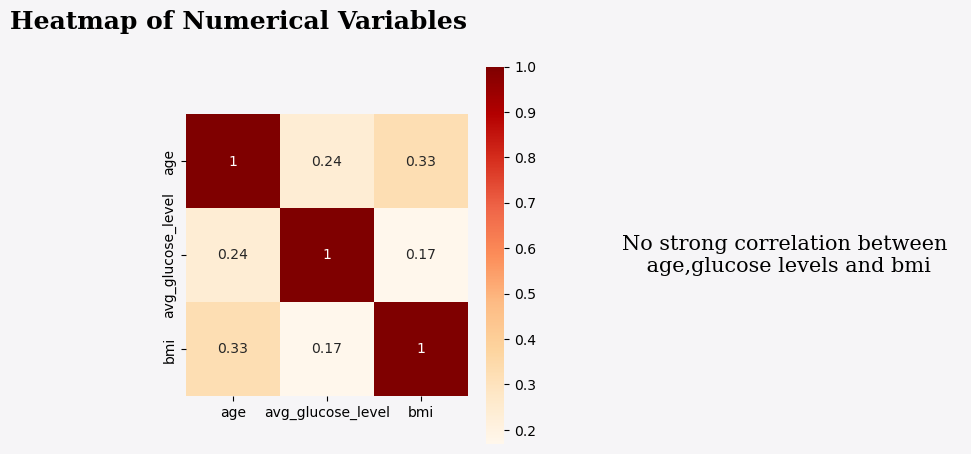

In [144]:
#correlación para variables numéricas
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
corrmat = data_numerical.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="OrRd",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n age,glucose levels and bmi',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Numerical Variables',fontsize=18,fontweight='bold',fontfamily='serif')    

In [167]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df=df[df['smoking_status']!='Unknown']

In [168]:
data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [169]:
data_stroke=df['stroke']
df.drop(columns=['stroke'],inplace=True)
df=df.merge(data_dummies,left_index=True, right_index=True,how='left')

In [170]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
#Dividir el set en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, train_size=0.2 , test_size=0.8)

# Regresion Logistica

In [76]:
modeloRL = LogisticRegression()
modeloRL.fit(x_train, y_train.values.ravel())
pred_RL = modeloRL.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#Matriz de confusión del modelo Regresión logistica.
matrizC = confusion_matrix(y_test, pred_RL)

In [78]:
#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL MODELO DE REGRESIÓN LOGISTICA.

exactitudMRL = accuracy_score(y_test, pred_RL)
print("Exactitud ", exactitudMRL)

puntajef1MRL = f1_score(y_test, pred_RL, average='weighted')
print("Puntaje F1 ", puntajef1MRL)

clasificacionMRL = classification_report(y_test, pred_RL)
print("Clasificación", clasificacionMRL)

Exactitud  0.784086926042762
Puntaje F1  0.6891954630874887
Clasificación               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2237
           1       0.00      0.00      0.00       616

    accuracy                           0.78      2853
   macro avg       0.39      0.50      0.44      2853
weighted avg       0.61      0.78      0.69      2853



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [79]:
algoritmNB = GaussianNB()
algoritmNB.fit(x_train, y_train.values.ravel())
pred_NB = algoritmNB.predict(x_test)

In [80]:
#Matriz de confusión del algoritmo Naive bayes.
matrizNB = confusion_matrix(y_test, pred_NB)

In [81]:
#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO NAIVE BAYES.
exactitudANB = accuracy_score(y_test, pred_NB)
print("Exactitud ",exactitudANB)

puntajef1ANB = f1_score(y_test, pred_NB, average='weighted')
print("Puntaje F1 ",puntajef1ANB)

clasificacionANB = classification_report(y_test, pred_NB)
print("Clasificación", clasificacionANB)

Exactitud  0.9982474588152822
Puntaje F1  0.998244866229392
Clasificación               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2237
           1       1.00      0.99      1.00       616

    accuracy                           1.00      2853
   macro avg       1.00      1.00      1.00      2853
weighted avg       1.00      1.00      1.00      2853



# Support vector machine

In [82]:
algoritmSVC = SVC(kernel = 'linear')
algoritmSVC.fit(x_train, y_train.values.ravel())
pred_svc = algoritmSVC.predict(x_test)

In [83]:
#Matriz de confusión del algoritmo support vector machine.
matrizSVC = confusion_matrix(y_test, pred_svc)

In [84]:
#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO SUPPORT VECTOR MACHINE.
exactitudASVC = accuracy_score(y_test, pred_svc)
print("Exactitud ",exactitudASVC)

puntajef1ASVC = f1_score(y_test, pred_svc, average='weighted')
print("Puntaje F1 ",puntajef1ASVC)

clasificacionASVC = classification_report(y_test, pred_svc)
print("Clasificación", clasificacionASVC)

Exactitud  0.8110760602874167
Puntaje F1  0.7512820228813353
Clasificación               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2237
           1       0.91      0.14      0.24       616

    accuracy                           0.81      2853
   macro avg       0.86      0.57      0.57      2853
weighted avg       0.83      0.81      0.75      2853



# Random Forest

In [85]:
algoritmRFC = RandomForestClassifier()
algoritmRFC.fit(x_train, y_train.values.ravel())
pred_rfc = algoritmRFC.predict(x_test)

In [86]:
#Matriz de confusión del algoritmo random forest para clasificación.
matrizRFC = confusion_matrix(y_test, pred_rfc)

In [87]:
#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO RANDOM FOREST PARA CLASIFICACIÓN.
exactitudARFC = accuracy_score(y_test, pred_rfc)
print("Exactitud ",exactitudARFC)

puntajef1ARFC = f1_score(y_test, pred_rfc, average='weighted')
print("Puntaje F1 ",puntajef1ARFC)

clasificacionARFC = classification_report(y_test, pred_rfc)
print("Clasificación", clasificacionARFC)

Exactitud  1.0
Puntaje F1  1.0
Clasificación               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2237
           1       1.00      1.00      1.00       616

    accuracy                           1.00      2853
   macro avg       1.00      1.00      1.00      2853
weighted avg       1.00      1.00      1.00      2853



# K-Nearest Neighbors

In [88]:
algoritmKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
algoritmKNN.fit(x_train, y_train.values.ravel())
pred_knn = algoritmKNN.predict(x_test)

In [89]:
#Matriz de confusión del algoritmo k-nearest neighbors.
matrizKNN = confusion_matrix(y_test, pred_knn)

In [90]:
#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO K-NEAREST NEIGHBORS PARA CLASIFICACIÓN.
exactitudAKNN = accuracy_score(y_test, pred_knn)
print("Exactitud ",exactitudAKNN)

puntajef1AKNN = f1_score(y_test, pred_knn, average='weighted')
print("Puntaje F1 ",puntajef1AKNN)

clasificacionAKNN = classification_report(y_test, pred_knn)
print("Clasificación", clasificacionAKNN)

Exactitud  0.7150368033648791
Puntaje F1  0.6786475790045986
Clasificación               precision    recall  f1-score   support

           0       0.78      0.88      0.83      2237
           1       0.19      0.10      0.13       616

    accuracy                           0.72      2853
   macro avg       0.49      0.49      0.48      2853
weighted avg       0.65      0.72      0.68      2853



# Conclusion

EL mejor modelo es el realizado por el algoritmo de random forest para clasificación para los siguientes valores:

In [91]:
print("Exactitud ",exactitudARFC)
print("Puntaje F1 ",puntajef1ARFC)

Exactitud  1.0
Puntaje F1  1.0
